In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from data_loaders import model_names
from data_loaders import load_da
from calpycles.plotting.distributions import plot_samples_1d
from calpycles.parameters import ParametersDYCOMS_RF01 
PARAMS = ParametersDYCOMS_RF01()

Using custom matplotlib style from 'mplstyle' file


In [3]:
DA_list = {
    model_name: load_da(model_name)
    for model_name in model_names
}

Using specified parameter ranges to assemble dist_kwargs.
Loaded parameter samples from  ./data/WENO_FULLRES/DYCOMS_RF01_N64_seed0/samples_parameters_unconstrained.npy
Loading 64 samples for ensemble DYCOMS_RF01_N64_seed0...
... done loading samples for ensemble DYCOMS_RF01_N64_seed0.
Loaded observation DYCOMS_RF01_N64_seed0 from ./data/WENO_FULLRES/DYCOMS_RF01_N64_seed0/samples_observations.nc.
Using default parameter properties in parameter ensemble init.
Using specified parameter ranges to assemble dist_kwargs.
Loaded parameter samples from  ./data/WENO_LOWRES/DYCOMS_RF01_N64/samples_parameters_unconstrained.npy
Loading 64 samples for ensemble DYCOMS_RF01_N64...
... done loading samples for ensemble DYCOMS_RF01_N64.
Loaded observation DYCOMS_RF01_N64 from ./data/WENO_LOWRES/DYCOMS_RF01_N64/samples_observations.nc.
Using default parameter properties in parameter ensemble init.
Using specified parameter ranges to assemble dist_kwargs.
Loaded parameter samples from  ./data/MIXED_FULLRE

In [4]:
DA_list_synth = {
    model_name: load_da(model_name, synthetic=True)
    for model_name in model_names
}

Using specified parameter ranges to assemble dist_kwargs.
Loaded parameter samples from  ./data/WENO_FULLRES/DYCOMS_RF01_N64_seed0/samples_parameters_unconstrained.npy
Loading 64 samples for ensemble DYCOMS_RF01_N64_seed0...
... done loading samples for ensemble DYCOMS_RF01_N64_seed0.
Loaded observation DYCOMS_RF01_N64_seed0 from ./data/WENO_FULLRES/DYCOMS_RF01_N64_seed0/samples_observations.nc.


/cluster/work/climate/dgrund/git/dana-grund/CalPyCLES/environment/.venv/calpycles/lib/python3.9/site-packages/xarray/core/concat.py:544: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


Using default parameter properties in parameter ensemble init.
Using specified parameter ranges to assemble dist_kwargs.
Loaded parameter samples from  ./data/WENO_LOWRES/DYCOMS_RF01_N64/samples_parameters_unconstrained.npy
Loading 64 samples for ensemble DYCOMS_RF01_N64...
... done loading samples for ensemble DYCOMS_RF01_N64.
Loaded observation DYCOMS_RF01_N64 from ./data/WENO_LOWRES/DYCOMS_RF01_N64/samples_observations.nc.


/cluster/work/climate/dgrund/git/dana-grund/CalPyCLES/environment/.venv/calpycles/lib/python3.9/site-packages/xarray/core/concat.py:544: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


Using default parameter properties in parameter ensemble init.
Using specified parameter ranges to assemble dist_kwargs.
Loaded parameter samples from  ./data/MIXED_FULLRES/DYCOMS_RF01_N64/samples_parameters_unconstrained.npy
Loading 64 samples for ensemble DYCOMS_RF01_N64...
... done loading samples for ensemble DYCOMS_RF01_N64.
Loaded observation DYCOMS_RF01_N64 from ./data/MIXED_FULLRES/DYCOMS_RF01_N64/samples_observations.nc.


/cluster/work/climate/dgrund/git/dana-grund/CalPyCLES/environment/.venv/calpycles/lib/python3.9/site-packages/xarray/core/concat.py:544: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


Using default parameter properties in parameter ensemble init.
Using specified parameter ranges to assemble dist_kwargs.
Loaded parameter samples from  ./data/CENTRAL_FULLRES/DYCOMS_RF01_N64/samples_parameters_unconstrained.npy
Loading 64 samples for ensemble DYCOMS_RF01_N64...
... done loading samples for ensemble DYCOMS_RF01_N64.
Loaded observation DYCOMS_RF01_N64 from ./data/CENTRAL_FULLRES/DYCOMS_RF01_N64/samples_observations.nc.


/cluster/work/climate/dgrund/git/dana-grund/CalPyCLES/environment/.venv/calpycles/lib/python3.9/site-packages/xarray/core/concat.py:544: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


In [5]:
from calpycles.plotting import COLORS
C_PRIOR = COLORS[0]
C_WENO_FULLRES = COLORS[1]
C_MIXED = COLORS[2]
C_CENTRAL = COLORS[3]
C_WENO_LOWRES = COLORS[4]
C_WENO_FULLRES_SYNTH = COLORS[5]

DA = DA_list["WENO_FULLRES"]
Ec = DA.to_constrained(DA.E)

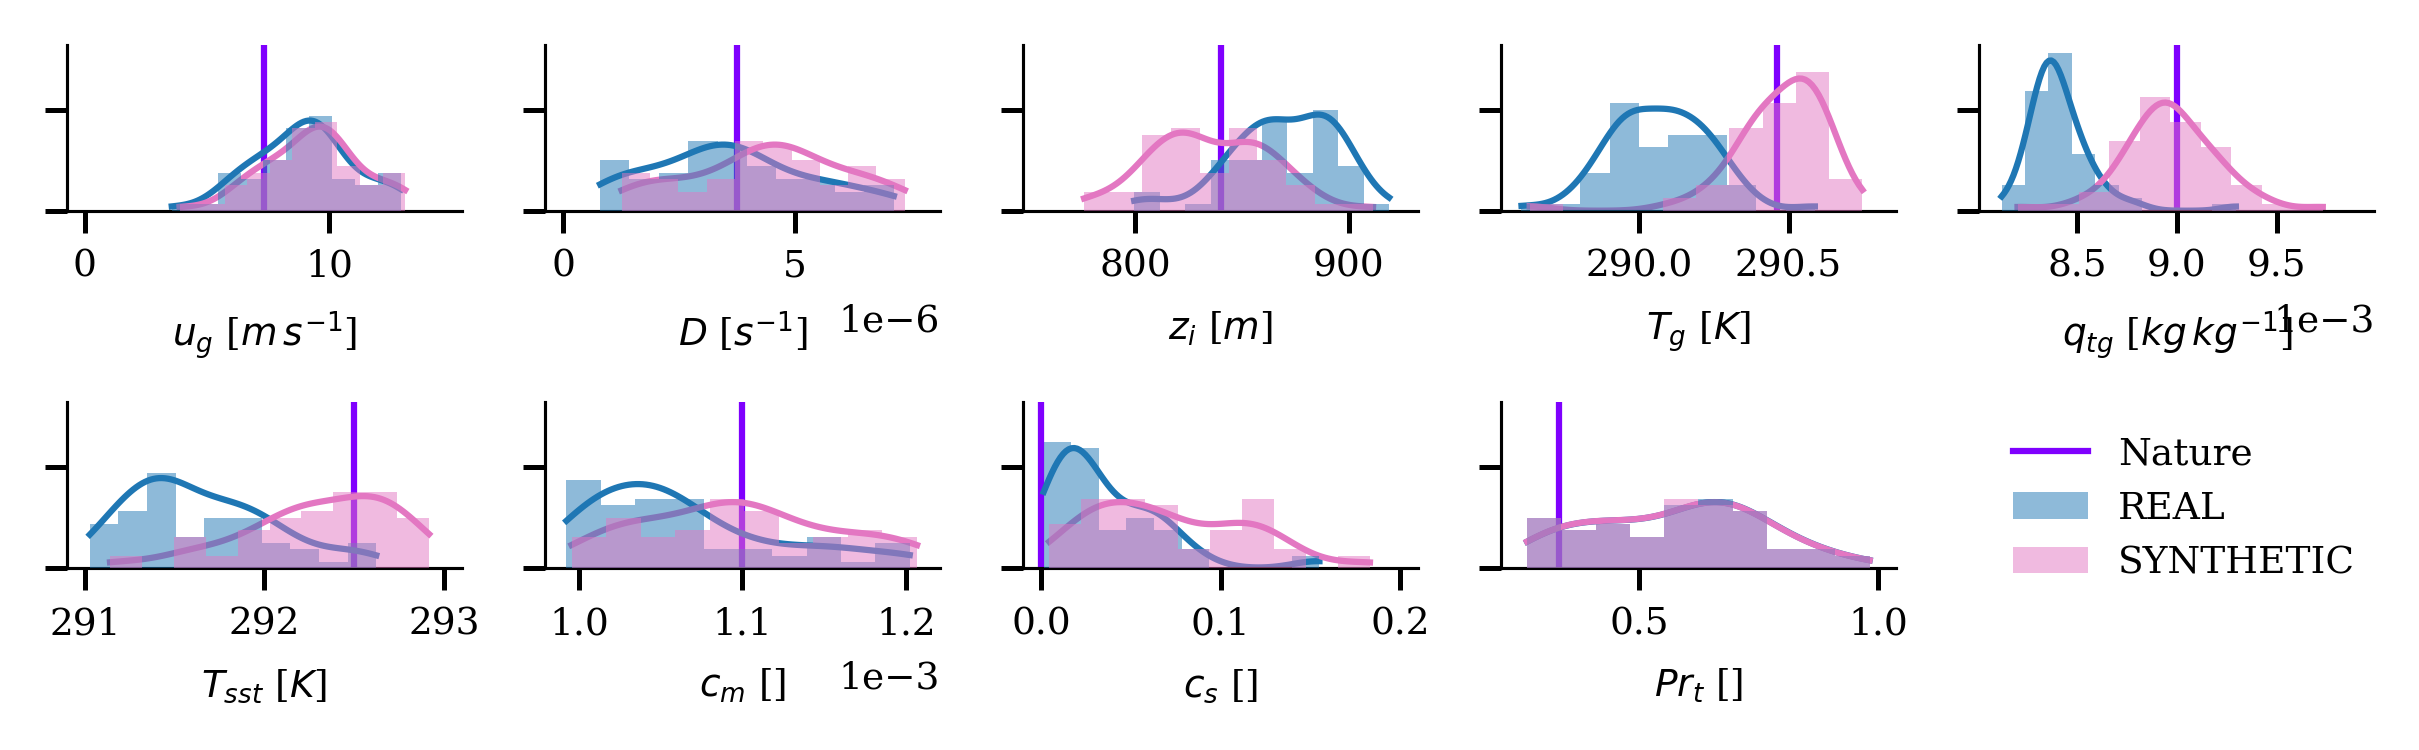

Saved figure  figs/dists_1d/fig-dist1d_real_synth_constrained


In [8]:
# real + synth
plot_samples_1d(
    [
        DA_list["WENO_FULLRES"].analysis(constrained=True),
        DA_list_synth["WENO_FULLRES"].analysis(constrained=True)
    ],
    [
        "REAL",
        "SYNTHETIC"
    ],
    colors = [
        C_WENO_FULLRES,
        C_WENO_FULLRES_SYNTH
    ],
    nature_params=PARAMS.defaults,
    lims="constrained",
    save_file="figs/dists_1d/fig-dist1d_real_synth_constrained",
)

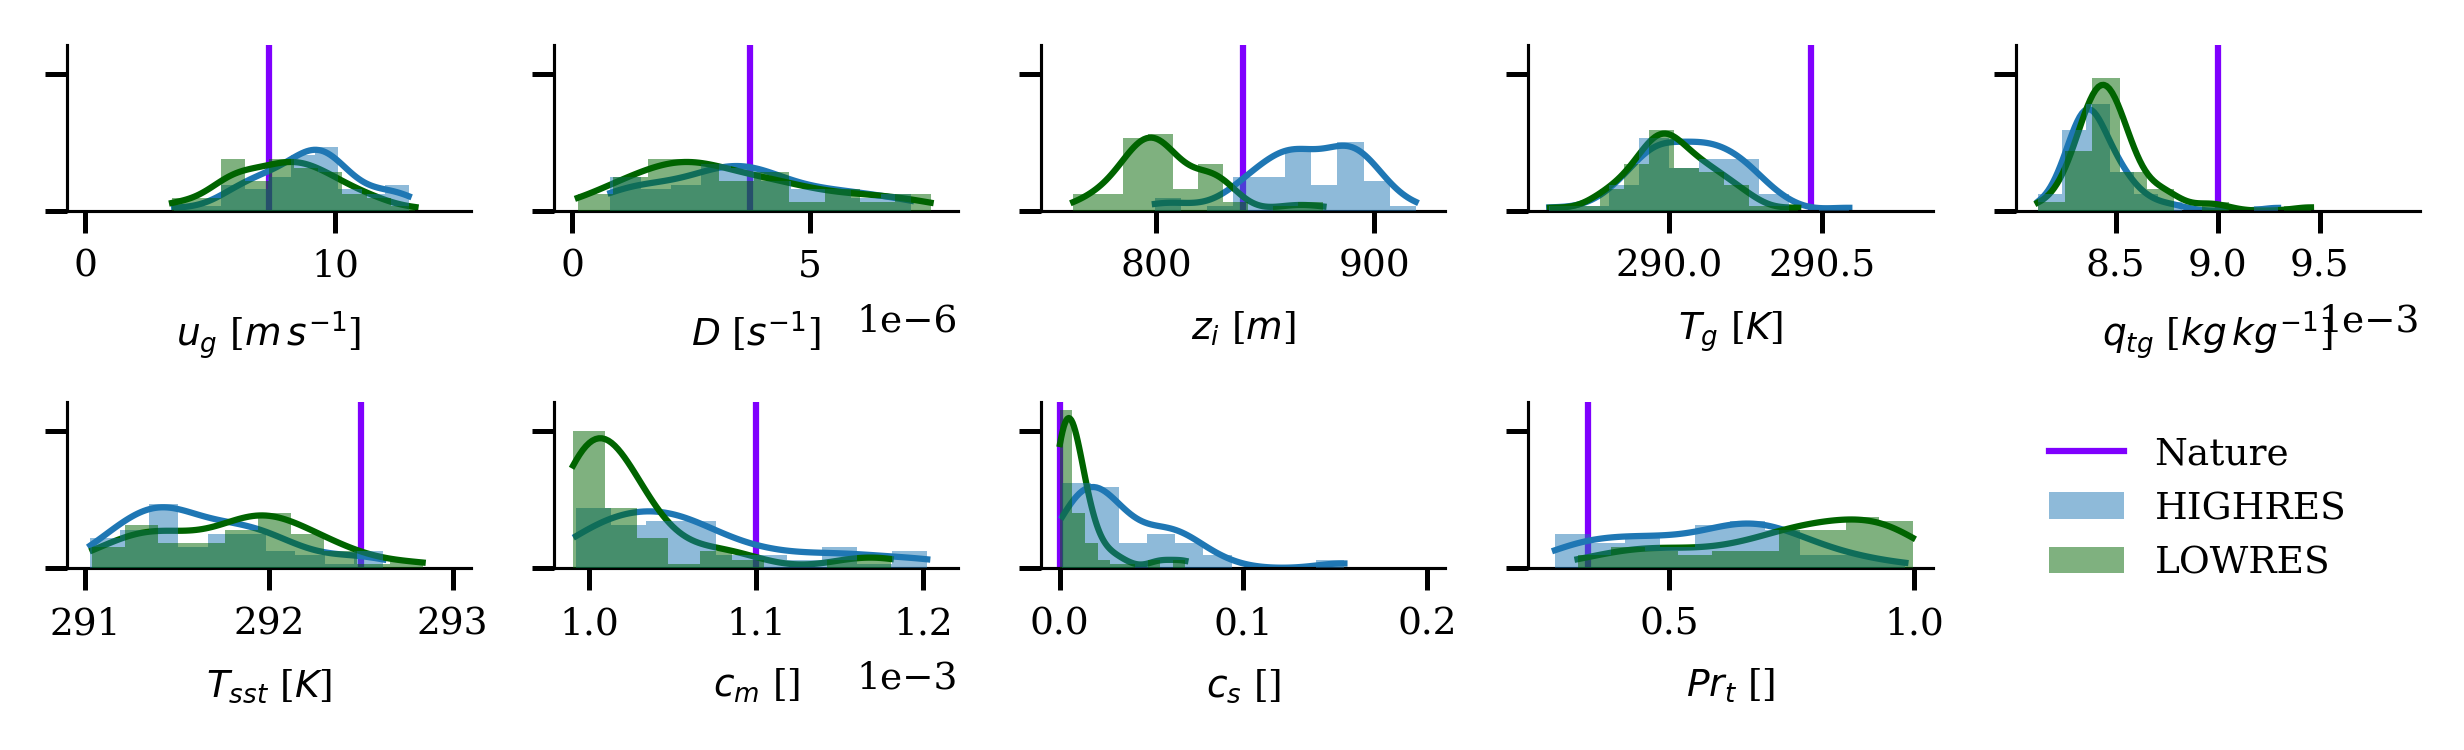

Saved figure  figs/dists_1d/fig-dist1d_high_lowres_constrained


In [9]:
# high + lowres
plot_samples_1d(
    [
        DA_list["WENO_FULLRES"].analysis(constrained=True),
        DA_list["WENO_LOWRES"].analysis(constrained=True)
    ],
    [
        "HIGHRES",
        "LOWRES"
    ],
    colors = [
        C_WENO_FULLRES,
        C_WENO_LOWRES
    ],
    nature_params=PARAMS.defaults,
    lims="constrained",
    save_file="figs/dists_1d/fig-dist1d_high_lowres_constrained",
)

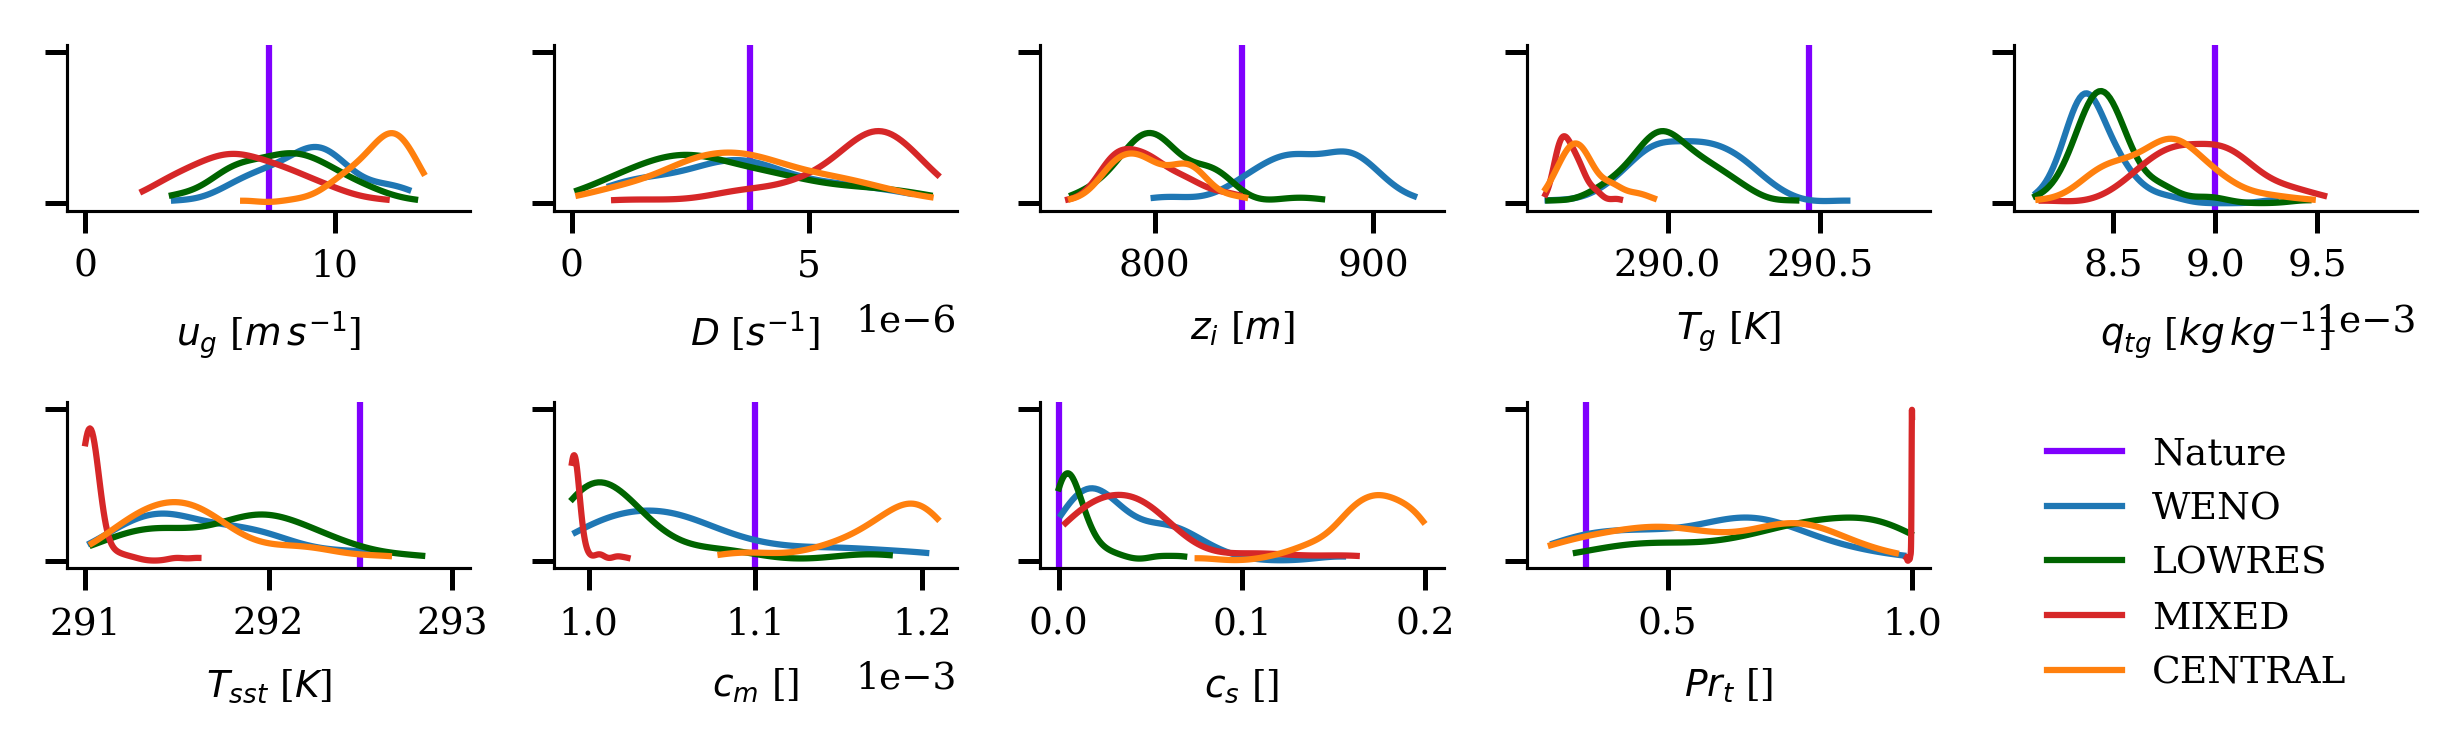

Saved figure  figs/dists_1d/fig-dist1d_num_res_constrained


In [7]:
# res+num
plot_samples_1d(
    [
        DA_list["WENO_FULLRES"].analysis(constrained=True),
        DA_list["WENO_LOWRES"].analysis(constrained=True),
        DA_list["MIXED_FULLRES"].analysis(constrained=True),
        DA_list["CENTRAL_FULLRES"].analysis(constrained=True),
    ],
    [
        "WENO",
        "LOWRES",
        "MIXED",
        "CENTRAL",
    ],
    colors = [
        C_WENO_FULLRES,
        C_WENO_LOWRES,
        C_MIXED,
        C_CENTRAL,
    ],
    nature_params=PARAMS.defaults,
    do_samples=False,
    lims="constrained",
    save_file="figs/dists_1d/fig-dist1d_num_res_constrained",
)

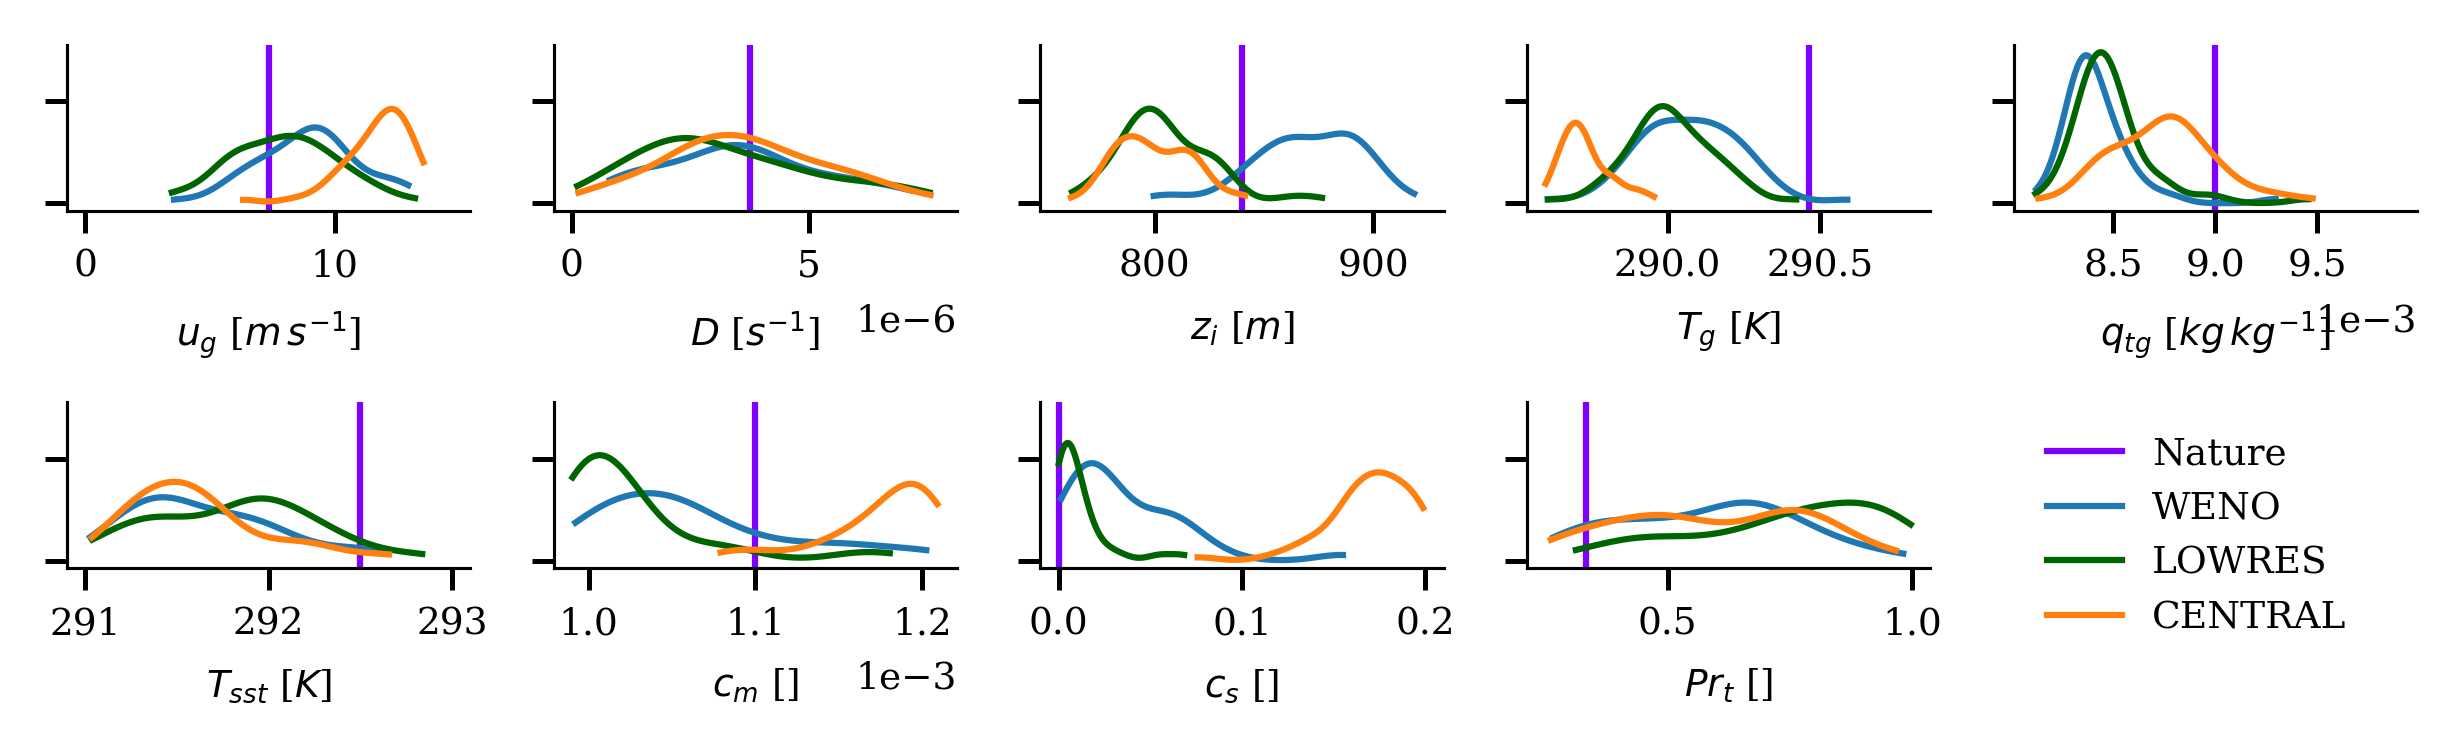

Saved figure  figs/dists_1d/fig-dist1d_num_res_noMIXED_constrained


In [6]:
# res+num without MIXED
plot_samples_1d(
    [
        DA_list["WENO_FULLRES"].analysis(constrained=True),
        DA_list["WENO_LOWRES"].analysis(constrained=True),
        # DA_list["MIXED_FULLRES"].analysis(constrained=True),
        DA_list["CENTRAL_FULLRES"].analysis(constrained=True),
    ],
    [
        "WENO",
        "LOWRES",
        # "MIXED",
        "CENTRAL",
    ],
    colors = [
        C_WENO_FULLRES,
        C_WENO_LOWRES,
        # C_MIXED,
        C_CENTRAL,
    ],
    nature_params=PARAMS.defaults,
    do_samples=False,
    lims="constrained",
    save_file="figs/dists_1d/fig-dist1d_num_res_noMIXED_constrained",
)

Setting measurement perturbation seed to 523640.
Setting measurement perturbation seed to 523641.
Setting measurement perturbation seed to 523642.
Setting measurement perturbation seed to 523643.
Setting measurement perturbation seed to 523644.
Setting measurement perturbation seed to 523645.
Setting measurement perturbation seed to 523646.
Setting measurement perturbation seed to 523647.
Setting measurement perturbation seed to 523648.
Setting measurement perturbation seed to 523649.


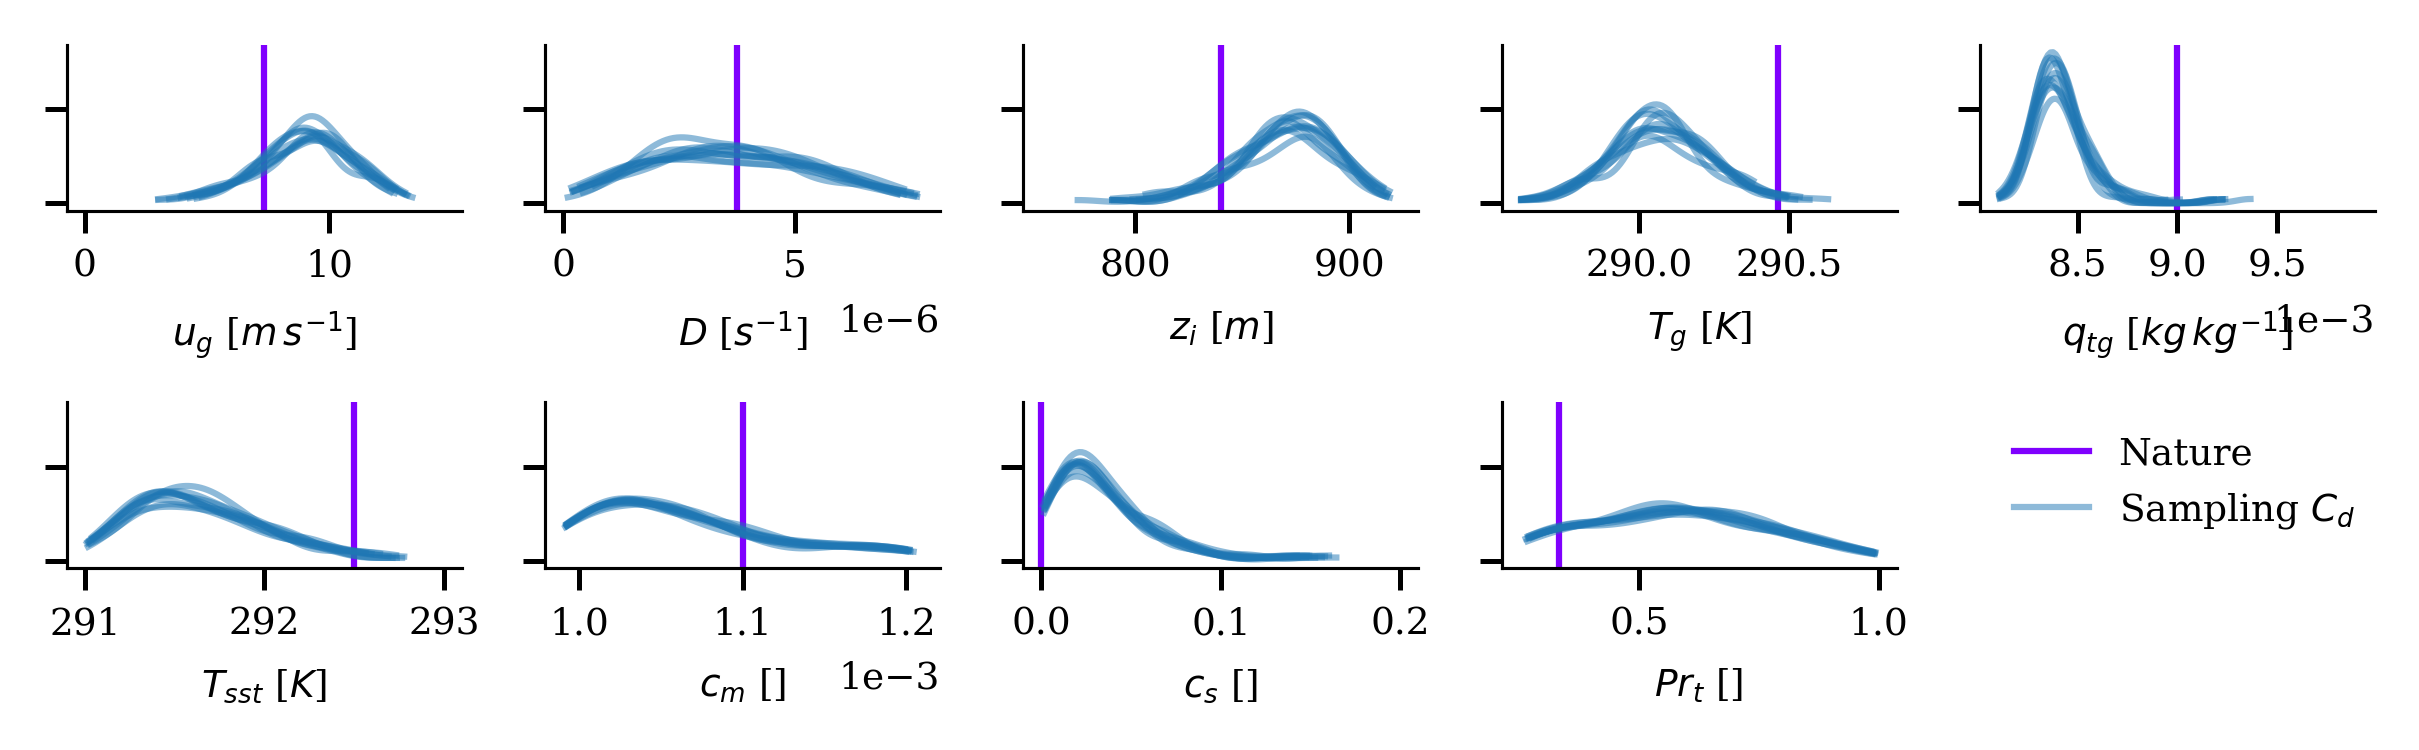

Saved figure  figs/dists_1d/fig-dist1d_sampling_Cd_constrained


In [10]:
# sampling error in D
N = 10
seeds = [523640+i for i in range(N)]
plot_samples_1d(
    [
        DA_list["WENO_FULLRES"].analysis(constrained=True, seed=seeds[i]) for i in range(N)
    ],
    [
        r"Sampling $C_d$",
    ] + [None  for i in range(N-1)],
    colors = [C_WENO_FULLRES for i in range(N)],
    alphas = [0.5 for i in range(N)],
    nature_params=PARAMS.defaults,
    do_samples=False,
    lims="constrained",
    save_file="figs/dists_1d/fig-dist1d_sampling_Cd_constrained",
)

Using specified parameter ranges to assemble dist_kwargs.
Loaded parameter samples from  ./data/WENO_FULLRES/DYCOMS_RF01_N64_seed0/samples_parameters_unconstrained.npy
Loading 64 samples for ensemble DYCOMS_RF01_N64_seed0...
... done loading samples for ensemble DYCOMS_RF01_N64_seed0.
Loaded observation DYCOMS_RF01_N64_seed0 from ./data/WENO_FULLRES/DYCOMS_RF01_N64_seed0/samples_observations.nc.
Using specified parameter ranges to assemble dist_kwargs.
Loaded parameter samples from  ./data/WENO_FULLRES/DYCOMS_RF01_N64_seed1/samples_parameters_unconstrained.npy
Loading 64 samples for ensemble DYCOMS_RF01_N64_seed1...
... done loading samples for ensemble DYCOMS_RF01_N64_seed1.
Loaded observation DYCOMS_RF01_N64_seed1 from ./data/WENO_FULLRES/DYCOMS_RF01_N64_seed1/samples_observations.nc.
Using specified parameter ranges to assemble dist_kwargs.
Loaded parameter samples from  ./data/WENO_FULLRES/DYCOMS_RF01_N64_seed2/samples_parameters_unconstrained.npy
Loading 64 samples for ensemble DY

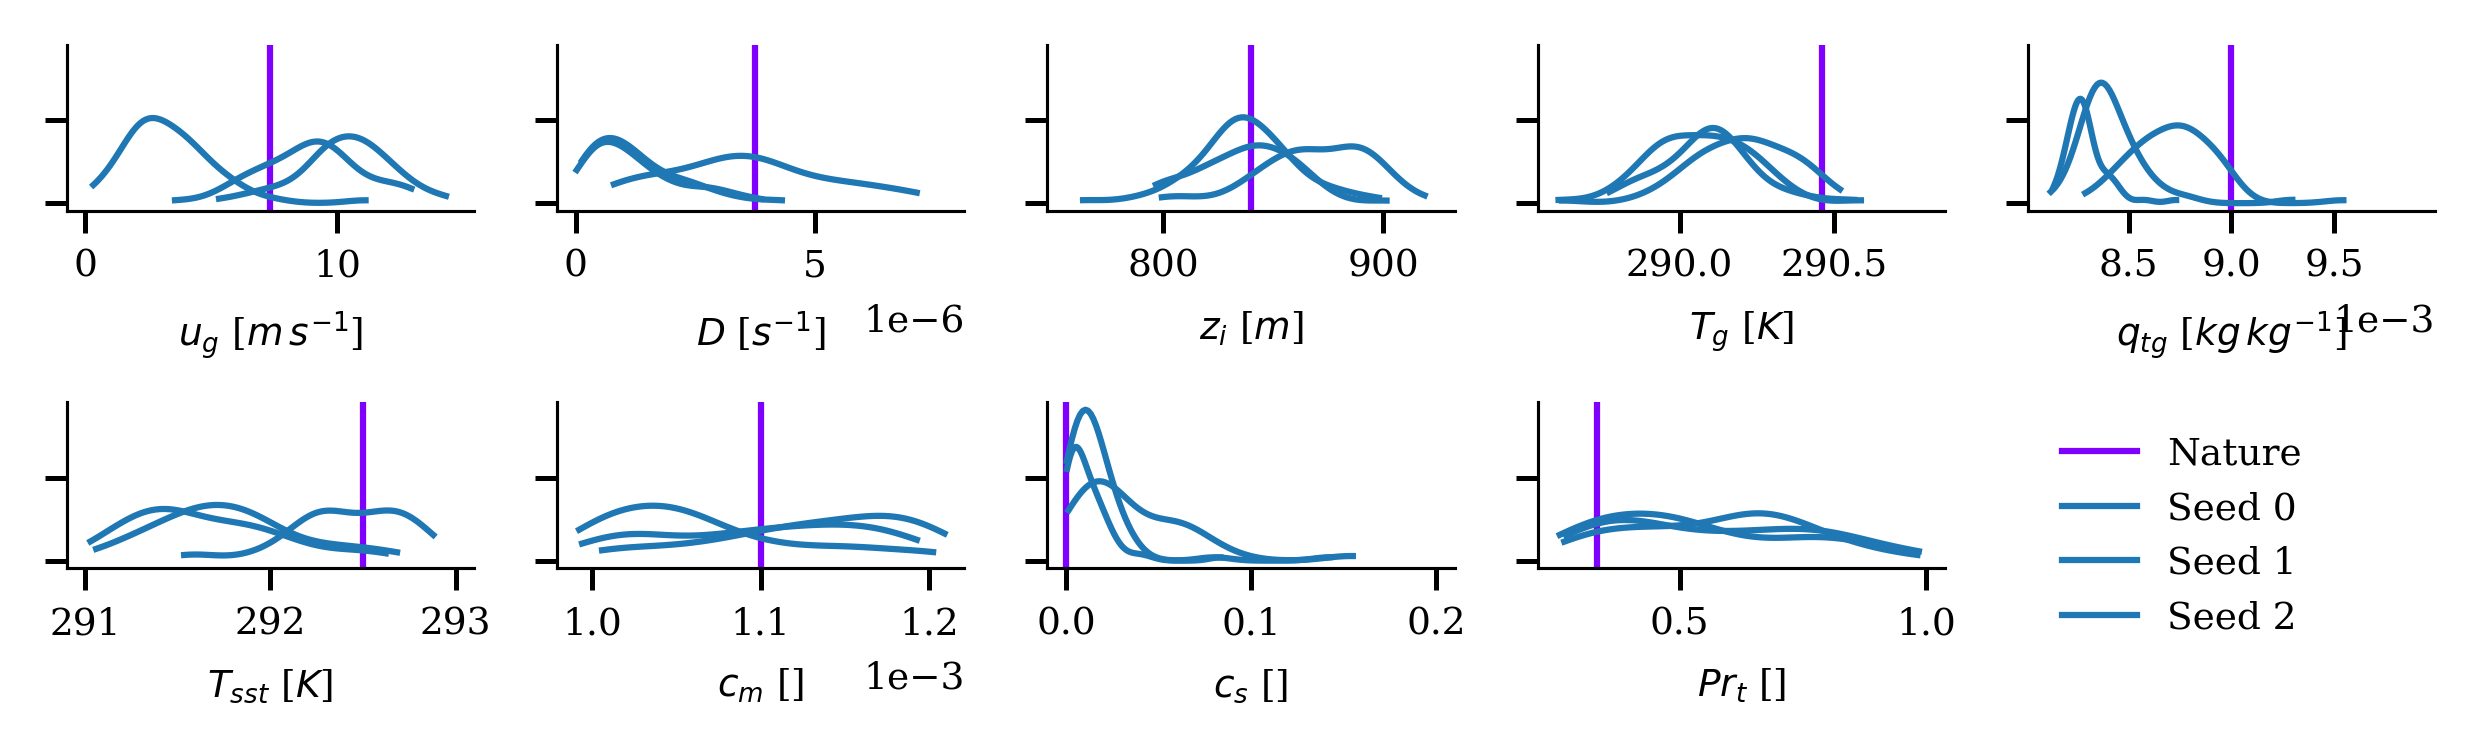

Saved figure  figs/dists_1d/fig-dist1d_prior_seeds_constrained


In [11]:
# prior sampling
N_seeds = 3

plot_samples_1d(
    [
        load_da("WENO_FULLRES", i_seed=i).analysis(constrained=True) for i in range(N_seeds)
    ],
    [
        f"Seed {i}" for i in range(N_seeds)
    ],
    colors = [
        C_WENO_FULLRES for i in range(N_seeds)
    ],
    nature_params=PARAMS.defaults,
    do_samples=False,
    lims="constrained",
    save_file="figs/dists_1d/fig-dist1d_prior_seeds_constrained",
)

Using specified parameter ranges to assemble dist_kwargs.
Loaded parameter samples from  ./data/WENO_FULLRES/DYCOMS_RF01_N64_seed0/samples_parameters_unconstrained.npy
Loading 64 samples for ensemble DYCOMS_RF01_N64_seed0...
... done loading samples for ensemble DYCOMS_RF01_N64_seed0.
Loaded observation DYCOMS_RF01_N64_seed0 from ./data/WENO_FULLRES/DYCOMS_RF01_N64_seed0/samples_observations.nc.


/cluster/work/climate/dgrund/git/dana-grund/CalPyCLES/environment/.venv/calpycles/lib/python3.9/site-packages/xarray/core/concat.py:544: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


Using specified parameter ranges to assemble dist_kwargs.
Loaded parameter samples from  ./data/WENO_FULLRES/DYCOMS_RF01_N64_seed1/samples_parameters_unconstrained.npy
Loading 64 samples for ensemble DYCOMS_RF01_N64_seed1...
... done loading samples for ensemble DYCOMS_RF01_N64_seed1.
Loaded observation DYCOMS_RF01_N64_seed1 from ./data/WENO_FULLRES/DYCOMS_RF01_N64_seed1/samples_observations.nc.


/cluster/work/climate/dgrund/git/dana-grund/CalPyCLES/environment/.venv/calpycles/lib/python3.9/site-packages/xarray/core/concat.py:544: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


Using specified parameter ranges to assemble dist_kwargs.
Loaded parameter samples from  ./data/WENO_FULLRES/DYCOMS_RF01_N64_seed2/samples_parameters_unconstrained.npy
Loading 64 samples for ensemble DYCOMS_RF01_N64_seed2...
... done loading samples for ensemble DYCOMS_RF01_N64_seed2.
Loaded observation DYCOMS_RF01_N64_seed2 from ./data/WENO_FULLRES/DYCOMS_RF01_N64_seed2/samples_observations.nc.


/cluster/work/climate/dgrund/git/dana-grund/CalPyCLES/environment/.venv/calpycles/lib/python3.9/site-packages/xarray/core/concat.py:544: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


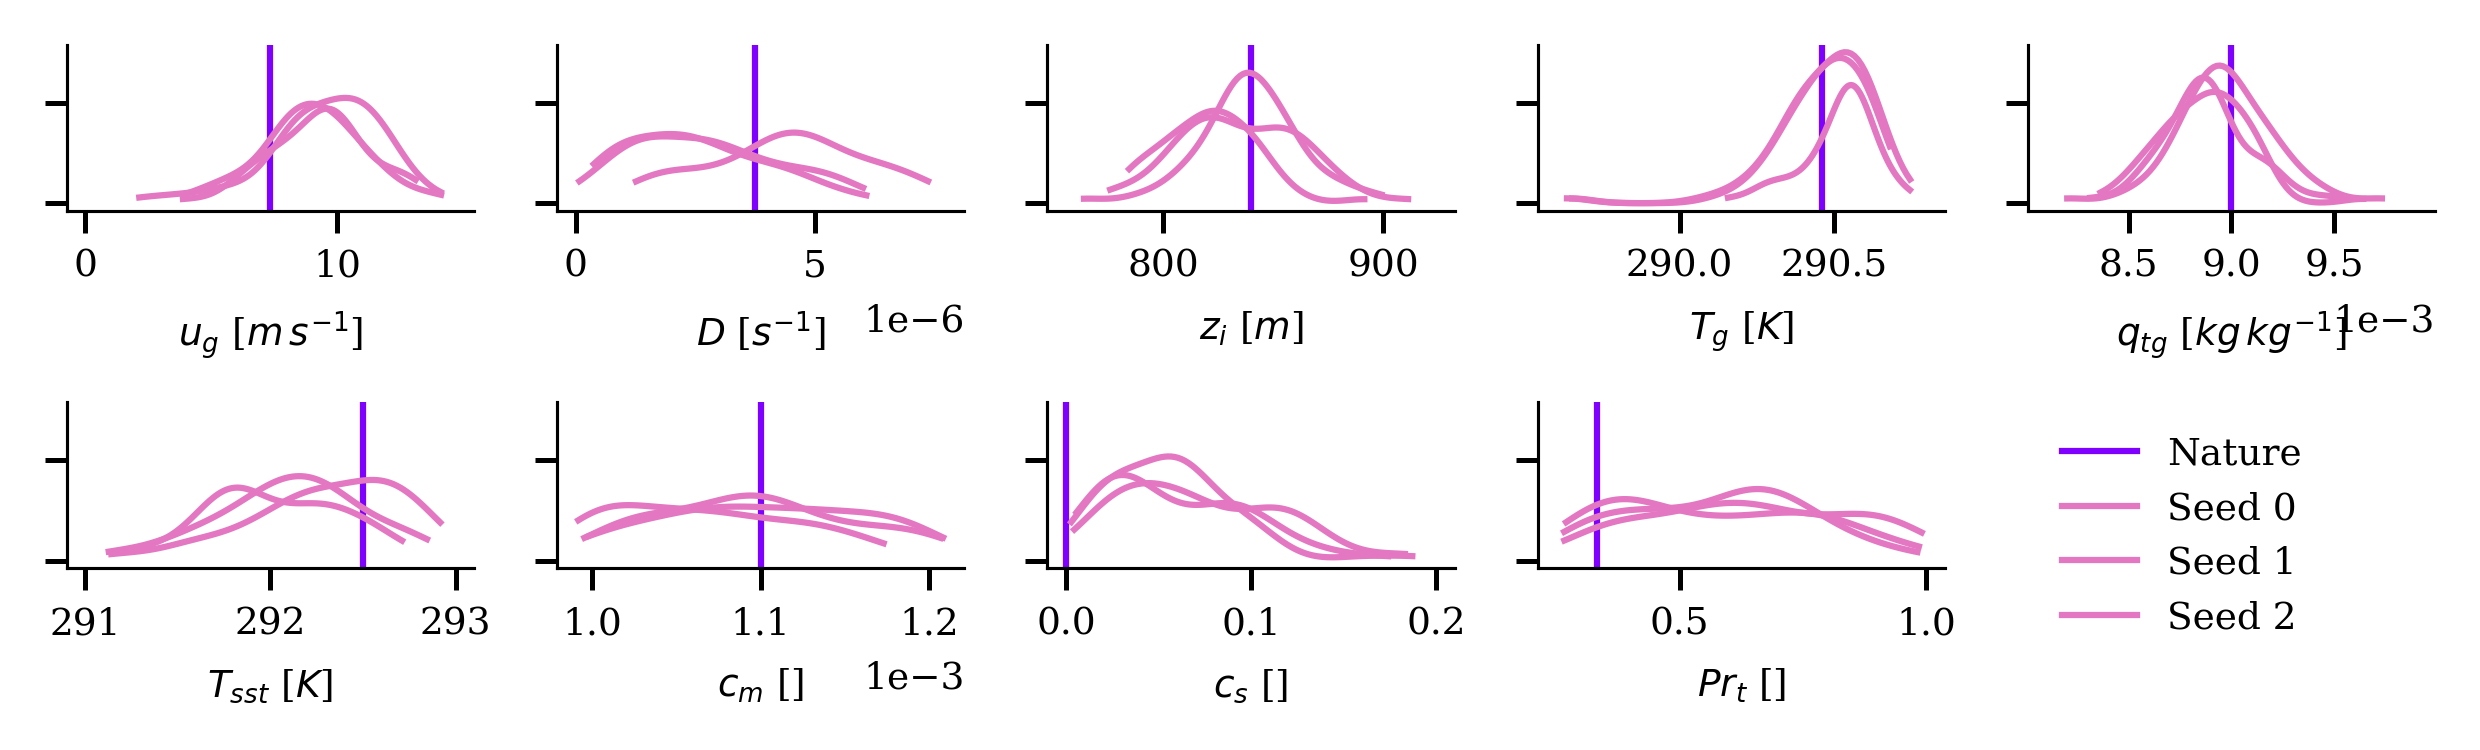

Saved figure  figs/dists_1d/fig-dist1d_prior_seeds_synth_constrained


In [12]:
# prior sampling SYNTH
N_seeds = 3

plot_samples_1d(
    [
        load_da("WENO_FULLRES", i_seed=i, synthetic=True).analysis(constrained=True) for i in range(N_seeds)
    ],
    [
        f"Seed {i}" for i in range(N_seeds)
    ],
    colors = [
        C_WENO_FULLRES_SYNTH for i in range(N_seeds)
    ],
    nature_params=PARAMS.defaults,
    do_samples=False,
    lims="constrained",
    save_file="figs/dists_1d/fig-dist1d_prior_seeds_synth_constrained",
)